In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('ecom_data.csv',encoding='latin-1')

In [5]:
# Check basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
# summary statistics
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
# check for any missing values
data.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
# check for duplicates
data.duplicated().sum()

np.int64(0)

In [9]:
# data types
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [10]:
data['Order Date']=pd.to_datetime(data['Order Date'])
data['Ship Date']=pd.to_datetime(data['Ship Date'])

# create some new columns for better insights
data['Order_year']=data['Order Date'].dt.year
data['Order_month']=data['Order Date'].dt.month
data['Ship_days']=(data['Ship Date']-data['Order Date']).dt.days
data['Order_day_of_week']=data['Order Date'].dt.dayofweek

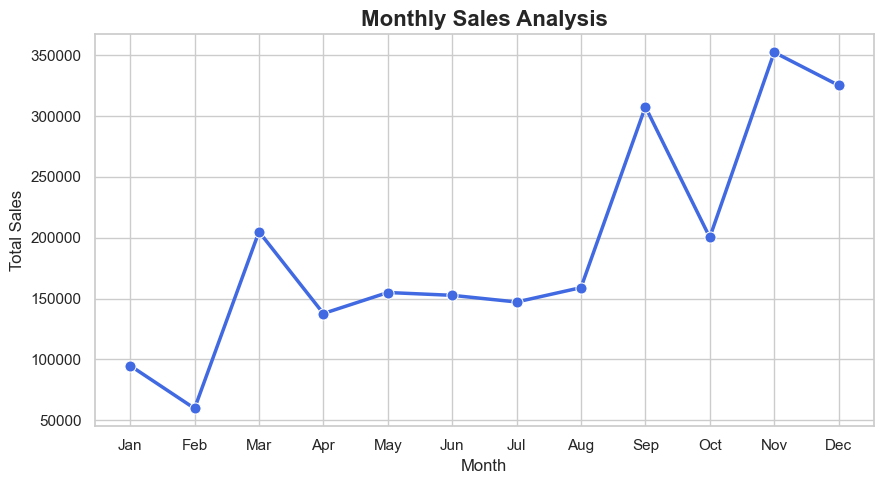

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate sales per month
sales_per_month = data.groupby('Order_month')['Sales'].sum().reset_index()
sales_per_month = sales_per_month.sort_values('Order_month')

# Set style
sns.set_theme(style="whitegrid")

plt.figure(figsize=(9, 5))

# Line plot with markers
sns.lineplot(
    data=sales_per_month,
    x="Order_month",
    y="Sales",
    marker="o",
    linewidth=2.5,
    color="royalblue",
    markersize=8
)

# Title and labels
plt.title("Monthly Sales Analysis", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)

# Replace numeric ticks with month names
plt.xticks(
    ticks=range(1, 13),
    labels=['Jan','Feb','Mar','Apr','May','Jun',
            'Jul','Aug','Sep','Oct','Nov','Dec']
)

plt.tight_layout()
plt.show()



In [14]:
# sales by category
sales_by_category=data.groupby('Category')['Sales'].sum().reset_index()
sales_by_category

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


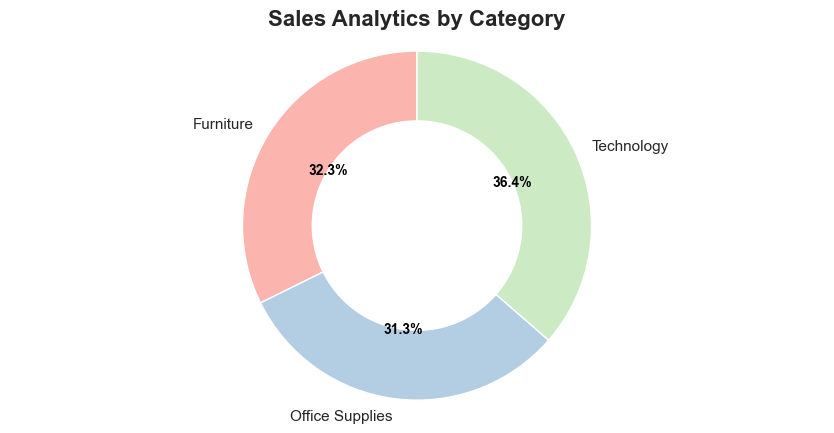

In [ ]:
import matplotlib.pyplot as plt

# Data
categories = sales_by_category['Category']
sales = sales_by_category['Sales']

# Colors (similar to Plotly Pastel)
colors = plt.cm.Pastel1.colors  

# Plot
fig, ax = plt.subplots(figsize=(8.5, 4.5))

# Create donut (pie with white circle in middle)
wedges, texts, autotexts = ax.pie(
    sales,
    labels=categories,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor="white")  # width=0.4 → donut look
)

# Style percentages inside
for autotext in autotexts:
    autotext.set_color("black")
    autotext.set_fontsize(10)
    autotext.set_weight("bold")

# Title
ax.set_title("Sales Analytics by Category", fontsize=16, weight="bold")

# Equal aspect ratio ensures circle is round
ax.axis("equal")

plt.tight_layout()
plt.show()



In [16]:
# sales analysis by sub category
sales_by_subcategory=data.groupby('Sub-Category')['Sales'].sum().reset_index()
sales_by_subcategory

,Sub-Category,Sales
0,Accessories,167380.3180
1,Appliances,107532.1610
2,Art,27118.7920
3,Binders,203412.7330
4,Bookcases,114879.9963
5,Chairs,328449.1030
6,Copiers,149528.0300
7,Envelopes,16476.4020
8,Fasteners,3024.2800
9,Furnishings,91705.1640


C:\Users\hp\AppData\Local\Temp\ipykernel_23704\4148918074.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




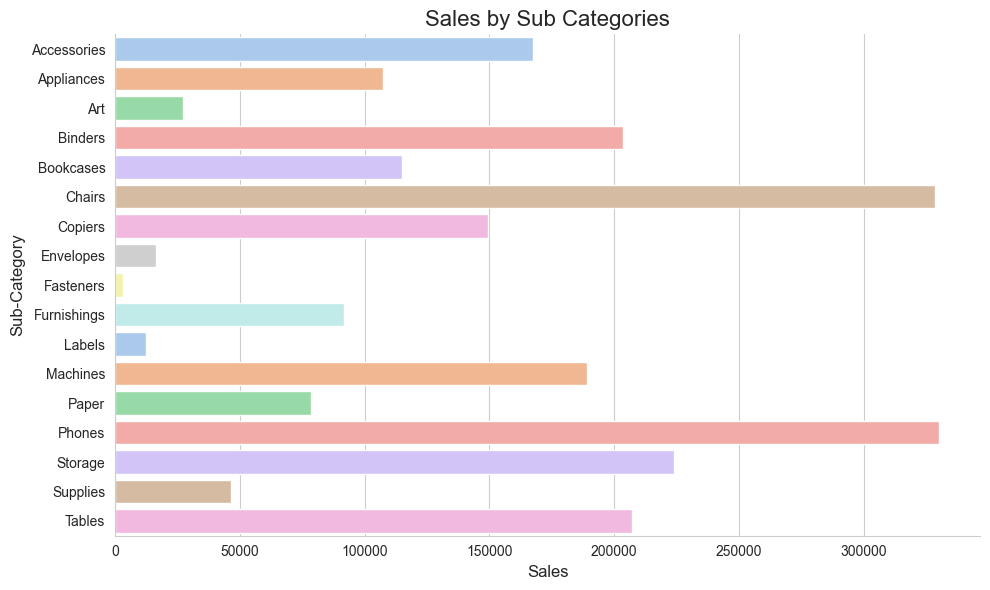

In [ ]:

# Set style for aesthetics
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Horizontal bar plot
sns.barplot(
    data=sales_by_subcategory,
    x='Sales',
    y='Sub-Category',
    palette="pastel"
)

# Title formatting
plt.title("Sales by Sub Categories", fontsize=16)

# Axis labels
plt.xlabel("Sales", fontsize=12)
plt.ylabel("Sub-Category", fontsize=12)

# Remove top/right spines for cleaner look
sns.despine()

plt.tight_layout()
plt.show()


In [18]:
# monthly profit analysis
monthly_profit=data.groupby('Order_month')['Profit'].sum().reset_index()
monthly_profit

,Order_month,Profit
0,1,9134.4461
1,2,10294.6107
2,3,28594.6872
3,4,11587.4363
4,5,22411.3078
5,6,21285.7954
6,7,13832.6648
7,8,21776.9384
8,9,36857.4753
9,10,31784.0413


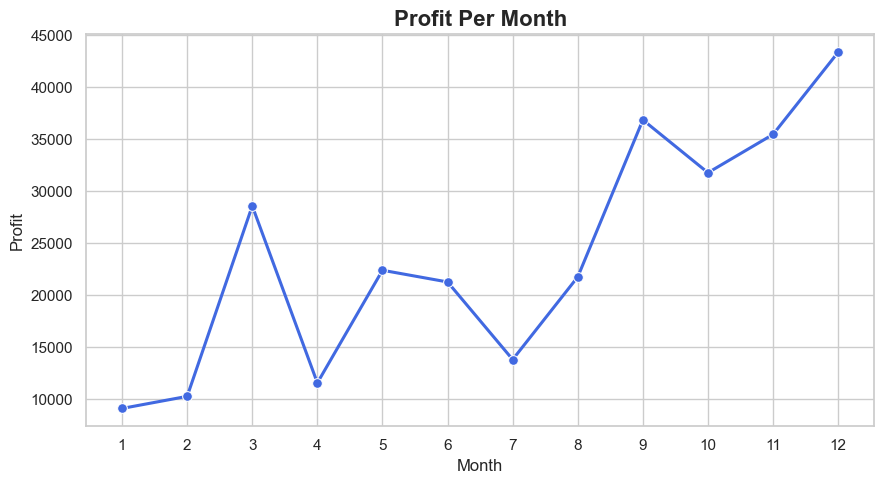

In [ ]:
# Set style
sns.set_theme(style="whitegrid")

# Create figure
plt.figure(figsize=(9, 5))  # good fit for GitHub README

# Line plot with markers
sns.lineplot(
    data=monthly_profit,
    x="Order_month",
    y="Profit",
    marker="o",
    color="royalblue",
    linewidth=2.2,
    markersize=7
)

# Title and labels
plt.title("Profit Per Month", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Profit", fontsize=12)

# Keep x-axis ticks as months (1–12)
plt.xticks(range(1, 13))

plt.tight_layout()
plt.show()


In [20]:
# profit by category
profit_per_category=data.groupby('Category')['Profit'].sum().reset_index()
profit_per_category

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


In [22]:
# profit by subcategory 
profit_per_subcategory=data.groupby('Sub-Category')['Profit'].sum().reset_index()
profit_per_subcategory

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560
5,Chairs,26590.1663
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


C:\Users\hp\AppData\Local\Temp\ipykernel_23704\449557303.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




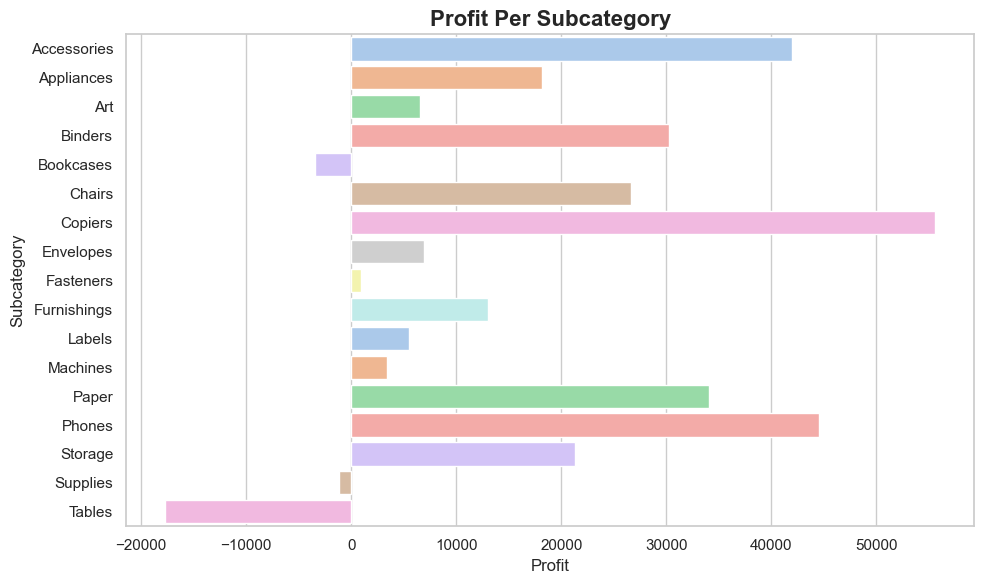

In [ ]:
# Set style
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

# Horizontal barplot for readability (lots of subcategories)
sns.barplot(
    data=profit_per_subcategory,
    x="Profit",
    y="Sub-Category",
    palette="pastel"
)

# Titles & labels
plt.title("Profit Per Subcategory", fontsize=16, fontweight="bold")
plt.xlabel("Profit", fontsize=12)
plt.ylabel("Subcategory", fontsize=12)

plt.tight_layout()
plt.show()


In [24]:
# sales and profit by customer segment
sales_profit_by_segment=data.groupby('Segment').agg({'Sales':'sum','Profit':'sum'}).reset_index()
sales_profit_by_segment

,Segment,Sales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


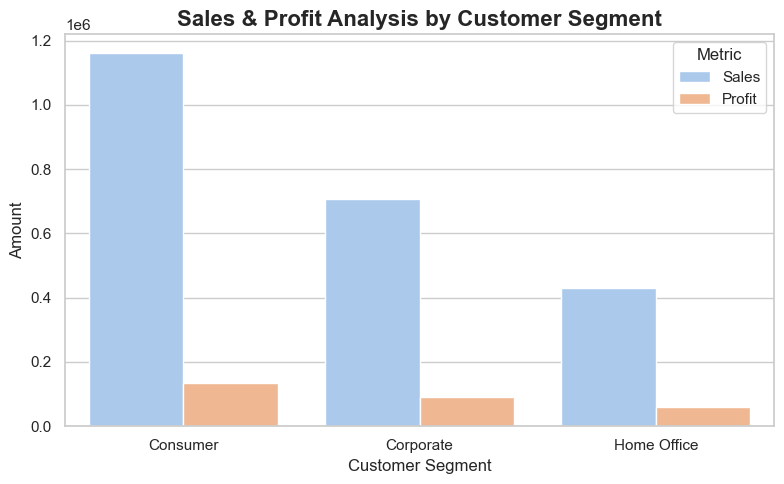

In [ ]:
# Set style
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 5))

# Melt the dataframe so we can plot Sales & Profit side by side
df_melted = sales_profit_by_segment.melt(
    id_vars="Segment",
    value_vars=["Sales", "Profit"],
    var_name="Metric",
    value_name="Amount"
)

# Create grouped barplot
sns.barplot(
    data=df_melted,
    x="Segment",
    y="Amount",
    hue="Metric",
    palette="pastel"
)

# Title and labels
plt.title("Sales & Profit Analysis by Customer Segment", fontsize=16, fontweight="bold")
plt.xlabel("Customer Segment", fontsize=12)
plt.ylabel("Amount", fontsize=12)

# Legend formatting
plt.legend(title="Metric", loc="best")

plt.tight_layout()
plt.show()



In [31]:
sales_profit_by_segment=data.groupby('Segment').agg({'Sales':'sum','Profit':'sum'}).reset_index()
sales_profit_by_segment['Sales_to_profit_ratio']=sales_profit_by_segment['Sales']/sales_profit_by_segment['Profit']
sales_profit_by_segment

,Segment,Sales,Profit,Sales_to_profit_ratio
0,Consumer,1.161401e+06,134119.2092,8.659471
1,Corporate,7.061464e+05,91979.1340,7.677245
2,Home Office,4.296531e+05,60298.6785,7.125416


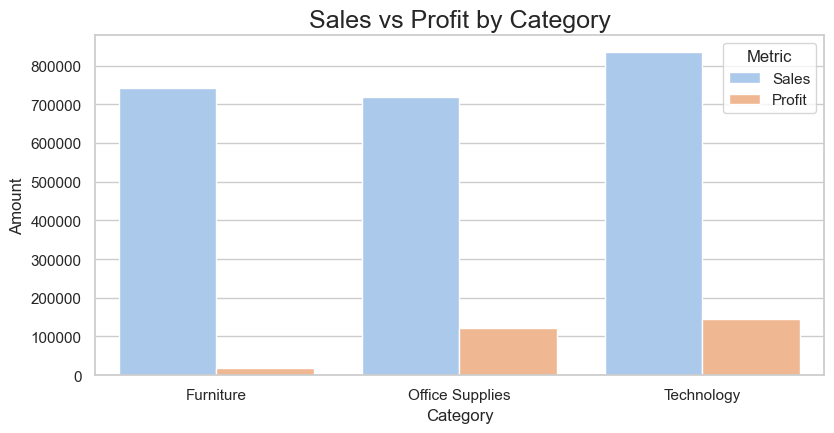

In [ ]:
# Aggregate Profit by Category if needed
profit_by_category = data.groupby("Category")["Profit"].sum().reset_index()
sales_by_category = data.groupby("Category")["Sales"].sum().reset_index()

# Create a grouped bar plot (Sales vs Profit)
import pandas as pd
merged = pd.merge(sales_by_category, profit_by_category, on="Category")

# Melt the data for seaborn
melted = merged.melt(id_vars="Category", value_vars=["Sales", "Profit"], 
                     var_name="Metric", value_name="Value")

# Bar plot
plt.figure(figsize=(8.5, 4.5))  # GitHub-friendly size
sns.barplot(x="Category", y="Value", hue="Metric", data=melted, palette="pastel")

plt.title("Sales vs Profit by Category", fontsize=18)
plt.ylabel("Amount")
plt.xlabel("Category")
plt.tight_layout()
plt.show()


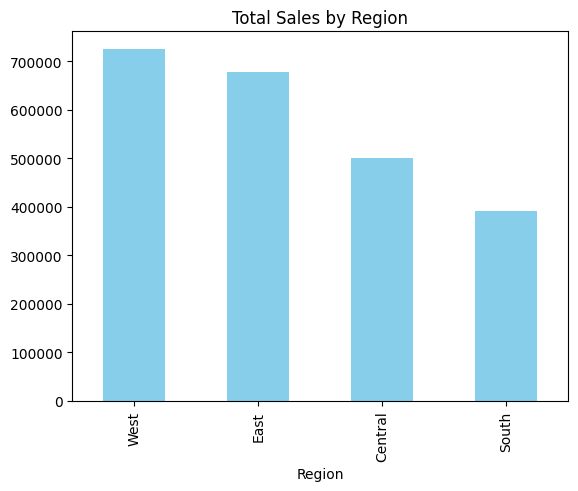

In [41]:
# Sales by Region
region_sales = data.groupby("Region")['Sales'].sum().sort_values(ascending=False)
region_sales.plot(kind="bar", color="skyblue")
plt.title("Total Sales by Region")
plt.show()

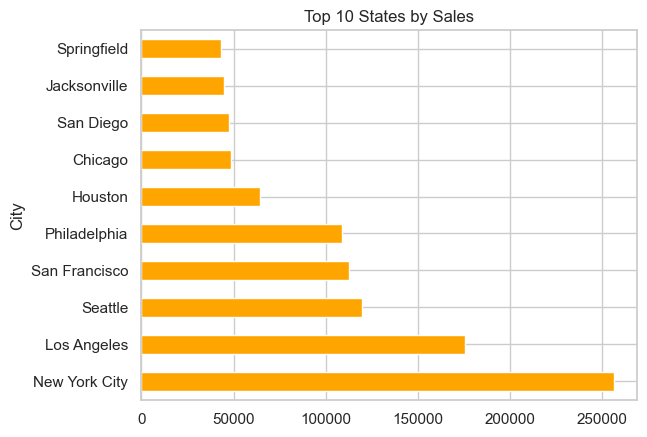

In [72]:
# Top 10 States by Sales
state_sales = data.groupby("City")['Sales'].sum().sort_values(ascending=False).head(10)
state_sales.plot(kind="barh", color="orange")
plt.title("Top 10 States by Sales")
plt.show()

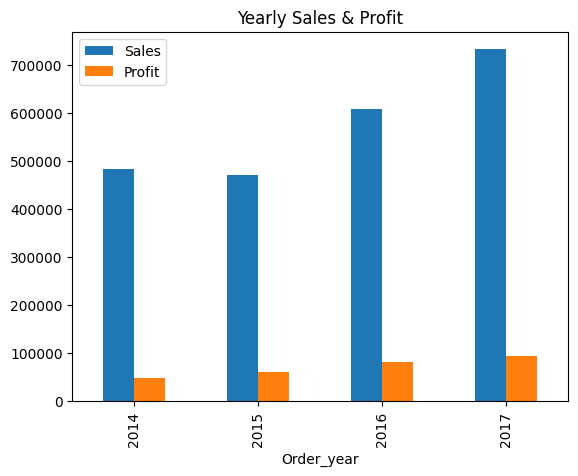

In [48]:
# Yearly Sales vs Profit
yearly = data.groupby("Order_year")[["Sales","Profit"]].sum()
yearly.plot(kind="bar")
plt.title("Yearly Sales & Profit")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_23704\3775180927.py:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




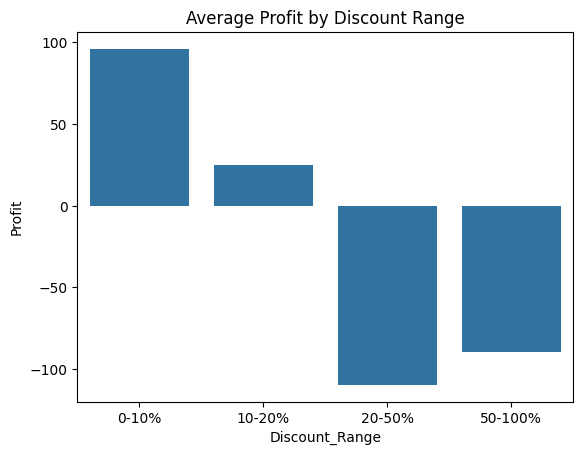

In [49]:
# Create bins for discounts
import numpy as np
data['Discount_Range'] = pd.cut(data['Discount'], bins=[0,0.1,0.2,0.5,1], 
                              labels=["0-10%","10-20%","20-50%","50-100%"])

sns.barplot(x="Discount_Range", y="Profit", data=data, estimator=np.mean, ci=None)
plt.title("Average Profit by Discount Range")
plt.show()